# Projeto eletromag - grupo 10 #

###### Integrantes: Alberto Carrera, Felipe Trintim, João Pedro Rodrigues, Matheus Castellucci 

### Etapa 1 ###

1)

Para calcular a frequencia de ressonancia de um conjunto rlc, temos a formula 

fr = 1/(2 * pi * sqrt(LC))

2)

In [2]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Tensão da Fonte e fator K
Ufonte = 5
k = 0.1

#indutâncias
L1 = L2 = 200e-6

#capacitância
C1 = C2 = 0.1e-6

#resistências
R1 = R2 = 0.5
Rc = 100

#frequência
f = 60

freq_reson=1/(2*pi*sqrt(L1*C1))
print(freq_reson)

(35588.127170858854+0j)


In [12]:
def CalcularIndutancias(f, L1, L2, C1, C2, k):
    w = 2*pi*f
    XL1=1j*w*L1
    XL2=1j*w*L2
    M=k*sqrt(L1*L2)
    XM=1j*w*M
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    paralelo = (XC2*Rc)/(XC2+Rc)
    return XL1, XL2, XM, XC1, XC2, paralelo

def CalcularTransformador1(Uf, f):
    C1 = C2 = 1/(((2*pi)**2)*(freq_reson**2)*L1)
    XL1, XL2, XM, XC1, XC2, paralelo = CalcularIndutancias(f, L1, L2, C1, C2, k)

    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    V2=i[1]*paralelo

    return i[0], i[1], V2


def CalcularTransformador(Uf, f):
    C1 = C2 = 1/(((2*pi)**2)*(fr**2)*L1)
    XL1, XL2, XM, XC1, XC2, paralelo = CalcularIndutancias(f, L1, L2, C1, C2, k)

    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    V2=i[1]*paralelo

    return i[0], i[1], V2


def CalcularTransformador2(Uf, f):
    XL1, XL2, XM, XC1, XC2, paralelo = CalcularIndutancias(f, L1, L2, C1, C2, k)

    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    V2=i[1]*paralelo

    return i[0], i[1], V2


3)

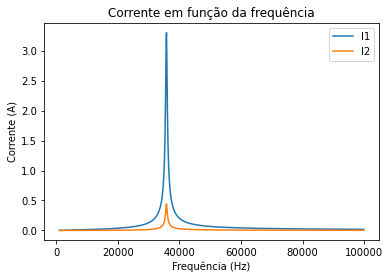

In [13]:
listaf = np.arange(1e3, 100e3, 100)
listai1 = []
listai2 = []

for f in listaf:
    i1, i2, v2 = CalcularTransformador1(Ufonte, f)
    listai1.append(abs(i1))
    listai2.append(abs(i2))

plt.plot(listaf, listai1, label="I1")
plt.plot(listaf, listai2, label="I2")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.title("Corrente em função da frequência")
plt.legend()
plt.show()



4)

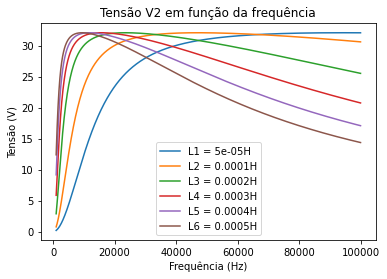

In [14]:
listal1 = [50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
listaLS = ["L1", "L2", "L3", "L4", "L5", "L6"]
listafr = np.arange(1e3, 1e5, 100)

for L1 in listal1:
    listav2 = []
    L2 = L1
    for fr in listafr:
        i1, i2, v2= CalcularTransformador(Ufonte, fr)
        listav2.append(abs(v2))
    l_atual = listaLS[listal1.index(L1)]
    plt.plot(listafr, listav2, label=f"{l_atual} = " + str(L1) + "H")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.title("Tensão V2 em função da frequência")
plt.legend()
plt.show()

5.

In [15]:
def CalcularEficiencia(Uf, f):
    XL1, XL2, XM, XC1, XC2, paralelo = CalcularIndutancias(f, L1, L2, C1, C2, k)
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)

    V1 = V[0]
    V2=i[1]*paralelo
    ic = V2/Rc
 
    S1=(V1/sqrt(2))*(i[0].conjugate()/sqrt(2))
    S2=(V2/sqrt(2))*(ic.conjugate()/sqrt(2))
    
    P1 = S1.real
    P2 = S2.real

    eficiencia = P2/P1
    return abs(eficiencia), P1, P2



18220.0


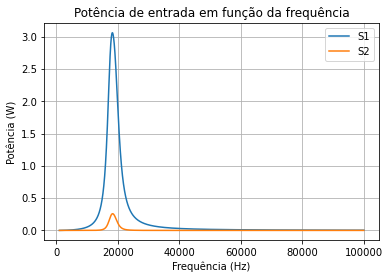

0.08468684601874939


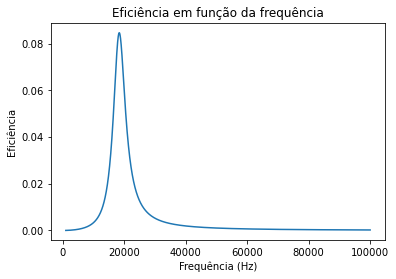

In [16]:
listaS1 = []
listaS2 = []
listaef = []
listafr = np.arange(1e3, 100e3, 10)

C1 = C2 = 1e-6
L1 = 75.68e-6
L2 = 75.5e-6
R1 = 1+282e-3
R2 = 1+260e-3
Rc = 100
Ufonte = 5*2/pi

for f in listafr:
    eficiencia, P1, P2 = CalcularEficiencia(Ufonte, f)
    listaef.append(eficiencia)
    listaS1.append(P1)
    listaS2.append(P2)

for i in listaS1:
    if i == max(listaS1):
        print(listafr[listaS1.index(i)])


plt.plot(listafr, listaS1, label="S1")
plt.plot(listafr, listaS2, label="S2")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.title("Potência de entrada em função da frequência")
plt.grid()
plt.legend()
plt.show()


print(max(listaef))
plt.plot(listafr, listaef)
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.title("Eficiência em função da frequência")
plt.show()


6.

Frequência de Resonância: 18294.88Hz
Valor de K da tensão máxima: 0.18
Tensão máxima alcançada: 8.59V


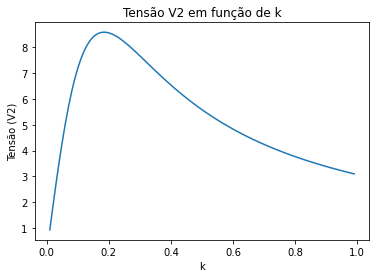

In [20]:
C1 = C2 = 1e-6
L1 = 75.68e-6
L2 = 75.5e-6
R1 = 1+282e-3
R2 = 1+260e-3  
Rc = 100
Ufonte = 5*2/pi
fr = 1/(2*pi*sqrt(L1*C1))
print(f"Frequência de Resonância: {abs(fr):.2f}Hz")

listak = np.arange(0.01, 1, 0.01)
listav2 = []

for k in listak:
    i1, i2, v2 = CalcularTransformador2(Ufonte, fr)
    listav2.append(abs(v2))

for i in listav2:
    if i == max(listav2):
        print(f"Valor de K da tensão máxima: {listak[listav2.index(i)]:.2f}")

print(f"Tensão máxima alcançada: {max(listav2):.2f}V")

plt.plot(listak, listav2)
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.title("Tensão V2 em função de k")
plt.show()

## Grafico conclusivo variando o RC

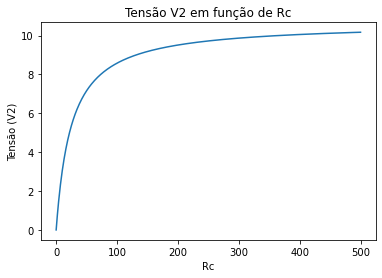

In [29]:
k = 0.18
C1 = C2 = 1e-6
L1 = 75.68e-6
L2 = 75.5e-6
R1 = 1+282e-3
R2 = 1+260e-3  
Ufonte = 5*2/pi
fr = 1/(2*pi*sqrt(L1*C1))

listarc = np.arange(0, 500, 1)
listav2 = []
listaef = []

for Rc in listarc:
    i1, i2, v2 = CalcularTransformador2(Ufonte, fr)
    listav2.append(abs(v2))

plt.plot(listarc, listav2)
plt.xlabel("Rc")
plt.ylabel("Tensão (V2)")
plt.title("Tensão V2 em função de Rc")
plt.show()

Quanto maior for o valor de Rc, menor será a corrente no secundario. Resultandado numa menor perda de tensão entre o primario e o secundario.

## Grafico conclusivo variando R1 e R2

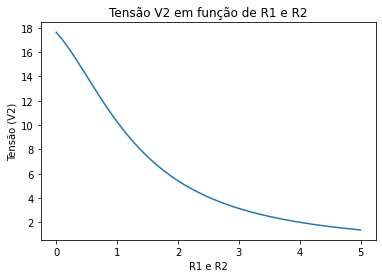

In [40]:
k = 0.18
Rc = 100
C1 = C2 = 1e-6
L1 = 75.68e-6
L2 = 75.5e-6
lista_Rs = np.arange(0, 5, 0.001)

Ufonte = 5*2/pi
fr = 1/(2*pi*sqrt(L1*C1))
listav2 = []


for r in lista_Rs:
    R1 = R2 = r
    i1, i2, v2 = CalcularTransformador2(Ufonte, fr)
    listav2.append(abs(v2))

plt.plot(lista_Rs, listav2)
plt.xlabel("R1 e R2")
plt.ylabel("Tensão (V2)")
plt.title("Tensão V2 em função de R1 e R2")
plt.show()

Solução para o problema de R1 e R2 seria utilizar de um tipo especial de fio, o Litz Wire.
Esse fio reduz ao máximo a resistência ao minimizar o Efeito Pelicular, que é o fenômeno que faz com que a corrente elétrica se concentre na superfície do fio, aumentando a resistência do mesmo.
https://en.wikipedia.org/wiki/Litz_wire

## Gráfico conclusivo variando a bobina (mais camadas = maior resistência)

Podemos assumir que todos os parâmetros da bobina crescrem de forma linear, por exemplo, se dobrarmos o número de camadas, dobramos o valor de L, resultando numa qudruplicação dos valores de R.